# 01 — EDA: NOAA Storm Events

Follow the numbered cells to load the CSV, inspect, and do basic plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

RAW = Path('../data/raw')
# TODO: change the file name to your actual CSV
csv = next(RAW.glob('StormEvents_details-*.csv'), None)
assert csv is not None, 'Put your StormEvents_details-*.csv into data/raw first.'
df = pd.read_csv(csv, low_memory=False)
df.columns = df.columns.str.lower()
df.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,...,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
0,202503,31,1104,202503,31,1106,201366,1252415,GEORGIA,13,...,2.0,W,TYUS,33.4757,-85.238,33.4757,-85.238,A cold-front initiated a line of thunderstorms...,Tree down at the intersection of highway 5 and...,CSV
1,202503,30,1552,202503,30,1555,200337,1241136,MICHIGAN,26,...,1.0,NNE,EDWARDSBURG,41.7900,-86.100,41.8200,-86.070,A cold front pushed into the area during the a...,A brief EF-1 tornado was confirmed in Edwardsb...,CSV
2,202501,5,1800,202501,6,2227,197733,1222851,VIRGINIA,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An area of low pressure tracked across souther...,NaN,CSV
3,202501,3,1300,202501,3,1900,197761,1223112,MARYLAND,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An area of low pressure moved off into New Eng...,NaN,CSV
4,202501,3,1300,202501,3,1900,197761,1223113,MARYLAND,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An area of low pressure moved off into New Eng...,NaN,CSV


In [2]:
# Basic sanity checks
df.shape, df.dtypes.head(), df.isna().sum().head()

((33904, 51),
 begin_yearmonth    int64
 begin_day          int64
 begin_time         int64
 end_yearmonth      int64
 end_day            int64
 dtype: object,
 begin_yearmonth    0
 begin_day          0
 begin_time         0
 end_yearmonth      0
 end_day            0
 dtype: int64)

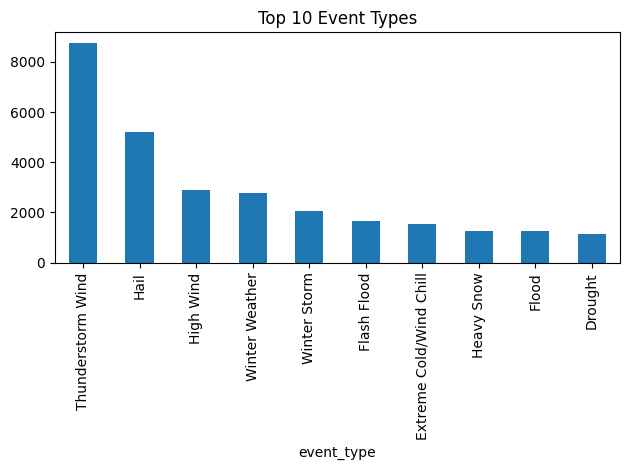

In [3]:
# Quick plot: top 10 event types
df['event_type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Event Types')
plt.tight_layout()